### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2019
---

## Project Final Report

## Project Title: Best Selling Books on Paytm.com

## Student(s): Hong Son, Brian Kong

#### Date: 6/4/2019
---

#### Abstract 
---
Books can be sources of knowledge, entertainment or both. The demand for books is something that is still present in todays society. Similar to many other products, books are being increasingly sold on Ecommerce platforms. This project seeks to analyze data sourced from the Ecommerce site Paytm.com. The goal is to reveal trends and understand what factors contribute to the popularity of certain books. The data set utilized is a 1500 row csv file detailing the infromation from each sale. We found that price and genre were some of the main factors that determine book popularity.

 


### 1. Introduction
---


   This project is focused on analyzing the perceived value and popularity of books being sold online in India. This data set was taken as subset of a larger dataset that was created by extracting data from paytm.com, which is a leading eCommerce store in India. The initial steps will be to clean, wrangle and reshape the data to get all the columns we need to do our analysis. 
   
   To analyze the data a quantitative method will be utilized. For example, common statistical methods such as mean, median, frequency, and percentage will be employed to provide further insight into the data. This univariate analysis will be useful when analyzing single variables. 
   
   Also being used is inferential analysis. The main inerential tool being utlized will be correlation. Correlation describes the relationship between two variables. If a correlation is found, it means that there is a relationship among the variables. For example, taller people tend to have a higher weight. Of course, correlation does not imply causation but it can still be useful to identify certain correlations.
   
   Combining univariate and bivariate analysis will provide the maximum depth of analysis. This will produce patterns and connections that can be followed to draw conclusions on the data. Creating visualizations will aid the human eye in recognizing these patterns and connections while also providing a convenient way to present the data.
   
   

### 2. Problem Definition


What are the factors that make a book popular? The answer to this question is often based on personal opinion. Authors and booksellers everywhere would derive great benfit from this knowledge. This project seeks to solve this problem by taking a data driven approach to analyzing perceived value and popularity. Examining factors such as genre, author, price, and publisher may offer more insight. Visualizing the data allows patterns and trends to be more easily identified. 


### 3. Data Sources
---
*(Describe the origin of the data sources. What is the format of the original data? How to access the data?)*

The dataset utilized in this project was obtained from Kaggle in a csv format. There are 1500 rows and 23 columns but there are 3 fields (desc, specifications, and other_sellers) with dictionaires.  This dataset is a subset of a larger dataset obtained from paytm.com. The columns included in the dataset are as follows: amtsave, brand, breadcrumbs, country, desc, discount, domain, gallery, image, insertedon, list_price, model, name, other_sellers, payment_methods_supported, productcode, selling_price, specifications, type, uniq_id, url, weight. In order to access the data, importing it from a csv will be the optimal solution. 



### 4. Other Things you Would Like to Describe
---
*(Is there anything you would like to describe as well? For example, preliminary analyses and results...)*

A few fields have been identified as useless. The weight column does not provide any information since all the values are the same. This also applies for the insertodon column and the url. There are also multiple fields that require string manipulation to obtain useable data. The desc field for example, has multiple values stored in it. Extracting data from these fields will be the bulk of the cleansing and reshaping work.

In the other sellers field, there can be up to 22 other sellers embedded in the column and we decided we wanted to analyze the first 6 sellers as the majority of other sellers is made from the 6 other sellers.

https://www.kaggle.com/PromptCloudHQ/bestseller-books-on-paytm

# Acquiring and Loading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 6))
from ast import literal_eval
import re
import json


In [2]:
# read in the csv we got from kaggle
books = pd.read_csv('books.csv')

In [3]:
books_shape = books.shape
print("There are " + str(books_shape[0]) + " rows and " + str(books_shape[1]) + " columns.")

There are 1500 rows and 22 columns.


# Cleaning and Wrangling the Data

For cleansing, we need to extract dictionaries from the columns so that we could get the appropriate column and the data we needed to do our analysis.

### There are a number of columns that provide no value to our analysis

In [4]:
# drop the columns that offer no value to our analysis
books = books.drop(columns=['country', 'domain', 'gallery', 'image', 'model', 'url', 'weight', 'uniq_id', 'type'])

## The desc column contains a large number of data entries

There are two entries that are important in the desc field. Those two fields are author and publisher. In order to extract the important data we must parse the field so that unecessary data can be removed.

In [5]:
# Take a look at one of the description
books_desc = books['desc']
books_desc[0]

'{"Description"=>{"Product Code"=>"9780553590487_20567", "ISBN-13"=>"9780553590487", "ISBN-10"=>"553590480", "Authored By"=>"Kay Hooper", "Publication Year"=>"2007", "Imprint"=>"Bantam", "Binding"=>"Others", "Languages"=>"English", "ISBN 13"=>"9780553590487"}, "Shipping Details"=>{"Estimated Arrival"=>"8 - 11 days", "Return Policy"=>"Seller will accept returns within a 15 days from date of delivery of the item"}}'

### Here we are formatting the desc column in a way that will allow us to extract relavent data such as Author and Publisher

In [6]:
# Parse and replace to create the dictionary we need
book_parse_desc = []
for a in books_desc:
    r = a.replace('=>', ':')
    r = r.replace('{"Description":', '')
    r = r.replace('{', '')
    r = r.replace('}', '')
    r = r.replace("'", "")
    r = r.replace("Shipping Details", '')
    r = r.replace("Terms & Condition", '')
    r = r.replace("Product Details", '')
    r = r.replace("Warranty Details", '')
    r = r.replace("Description", '')    
    r = r.replace('""' + ':', '')
    r = r.replace(' , ', '')
    r = "{" + r + "}"
    r = literal_eval(r)
    book_parse_desc.append(r)    

In [7]:
#create the dataframe from the parse descriptions
books1 = pd.DataFrame(x for x in book_parse_desc)


In [8]:
# fill Author and Publisher where they are nan and drop the original columns
books1['Author'] = books1['Author'].map(str).replace('nan', '') + ' ' + books1['Authored By']
books1['Publisher'] = books1['Publisher'].map(str).replace('nan', '') + ' ' + books1['Publisher Name']
books1 = books1.drop(columns=['Authored By', 'Publisher Name'])

In [9]:
# Take a look at our df
books1.head()

,About the Author,Age,Age wise,Author,Author Info,Binding,Brand,Dimensions (L X B X H),Edited By,Edition,...,Return Policy,Series Name,Shipping Charge,Specialization,Type,University,Warranty Summary,Weight,Weight(Gm),Weight(gm)
0,NaN,NaN,NaN,Kay Hooper,NaN,Others,NaN,NaN,NaN,NaN,...,Seller will accept returns within a 15 days fr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Devaki Nandan Khatri,NaN,Paperback,Rupa Publications India,NaN,NaN,NaN,...,Seller will accept returns within a 15 days fr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Tami Hoag,NaN,Paperback,Random House,NaN,NaN,2,...,Seller will accept returns within 7 days from...,NaN,NaN,NaN,NaN,NaN,NaN,410 gm,NaN,NaN
3,NaN,NaN,NaN,Danielle Steel,NaN,Paperback,Transworld Publishers,NaN,NaN,NaN,...,Seller will accept returns within a 15 days fr...,NaN,NaN,NaN,NaN,NaN,NaN,381 gm,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Paperback,Books,NaN,NaN,NaN,...,Seller will accept returns within a 15 days fr...,NaN,NaN,NaN,NaN,NaN,NaN,500 gm,NaN,NaN


In [10]:
books1.columns

Index(['About the Author', 'Age', 'Age wise', 'Author', 'Author Info',
       'Binding', 'Brand', 'Dimensions (L X B X H)', 'Edited By', 'Edition',
       'Estimated Arrival', 'ISBN 13', 'ISBN-10', 'ISBN-13', 'ISBN10',
       'ISBN13', 'Imprint', 'Imprints', 'Language', 'Languages',
       'No. Of Pages', 'Number Of Pages', 'Product Code', 'Product Weight',
       'Publication Year', 'Publisher', 'Publisher name', 'Return Policy',
       'Series Name', 'Shipping Charge', 'Specialization', 'Type',
       'University', 'Warranty Summary', 'Weight', 'Weight(Gm)', 'Weight(gm)'],
      dtype='object')

In [11]:
#books1['Publication Year']

#append the year of the book and remove the months and days after the year by splitting after the space
years = []
books_with_spec = books1[['Publication Year']]

for year in books_with_spec['Publication Year']:
    year = str(year)
    years.append(year.split(" ")[0])

In [12]:
#update the column with the year
books1['publication_year'] = years

In [13]:
# concat the original and new dataframe books1
new_books = pd.concat([books, books1], axis=1)

In [14]:
new_books

,amtsave,brand,breadcrumbs,desc,discount,insertedon,list_price,name,other_sellers,payment_methods_supported,...,Series Name,Shipping Charge,Specialization,Type,University,Warranty Summary,Weight,Weight(Gm),Weight(gm),publication_year
0,72,NaN,Books | Literature & Fiction | Romance | C.J.'...,"{""Description""=>{""Product Code""=>""978055359048...",20%%,2016-05-18 08:01:18 +0000,358,C.J.'s Fate,"[{""name"":""A1"",""id"":44120,""offer_text"":null,""of...","[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
1,117,Rupa Publications India,Books | Literature & Fiction | Short Stories |...,"{""Description""=>{""Brand""=>""Rupa Publications I...",30%%,2016-05-18 08:01:18 +0000,395,Chandrakanta,"[{""name"":""comma365 "",""id"":21057,""offer_text"":n...","[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
2,57,Random House,Books | Literature & Fiction | Romance | Heart...,"{""Description""=>{""Brand""=>""Random House"", ""Pro...",14%%,2016-05-18 08:01:18 +0000,416,Heart Of Dixie,NaN,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",...,NaN,NaN,NaN,NaN,NaN,NaN,410 gm,NaN,NaN,2008
3,84,Transworld Publishers,Books | Literature & Fiction | General | Perfe...,"{""Description""=>{""Brand""=>""Transworld Publishe...",21%%,2016-05-18 08:01:18 +0000,399,Perfect Life,"[{""name"":""comma365 "",""id"":21057,""offer_text"":n...","[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",...,NaN,NaN,NaN,NaN,NaN,NaN,381 gm,NaN,NaN,2015
4,1050,Books,Books | Literature & Fiction | Literature | Pa...,"{""Description""=>{""Brand""=>""Books"", ""Product Co...",35%%,2016-05-18 08:01:18 +0000,2999,Paulo Coelho The Golden Collection,"[{""name"":""NSGlobal"",""id"":95907,""offer_text"":nu...","[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",...,NaN,NaN,NaN,NaN,NaN,NaN,500 gm,NaN,NaN,2015
5,63,Random House Publishing Group,Books | Literature & Fiction | Suspense Thrill...,"{""Description""=>{""Brand""=>""Random House Publis...",14%%,2016-05-18 08:01:18 +0000,462,The Devil's Banker,NaN,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
6,75,Dell,Books | Literature & Fiction | Suspense Thrill...,"{""Description""=>{""Brand""=>""Dell"", ""Product Cod...",14%%,2016-05-18 08:01:18 +0000,554,The Brethren,NaN,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",...,NaN,NaN,NaN,NaN,NaN,NaN,500gm,NaN,NaN,2012
7,53,Random House,Books | Literature & Fiction | General | The I...,"{""Description""=>{""Brand""=>""Random House"", ""Pro...",11%%,2016-05-18 08:01:18 +0000,485,The Innocent,NaN,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",...,NaN,NaN,NaN,NaN,NaN,NaN,395 gm,NaN,NaN,2014
8,63,Random House Publishing Group,Books | Literature & Fiction | Romance | True ...,"{""Description""=>{""Brand""=>""Random House Publis...",14%%,2016-05-18 08:01:18 +0000,462,True Love,NaN,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
9,90,Harper Collins Publishers India,Books | Literature & Fiction | General | Warri...,"{""Description""=>{""Brand""=>""Harper Collins Publ...",36%%,2016-05-18 08:01:18 +0000,250,Warriors: Power of Three #3: Outcast,NaN,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",...,NaN,NaN,NaN,NaN,NaN,NaN,500 gm,NaN,NaN,2015


## The other_sellers field also contains information that must be extracted into new columns

The other_sellers field contains multiple other sellers that must be extracted and added as new columns. We extracted 5 other sellers along with the price at which they sold. These other sellers along with the selling price were then made into new columns. There was a max of 22 sellers.

### The code below illustrates the process

In [15]:
# We only wanted to keep up to the 6th option in sellers since they make the majority of the data
other_sellers = books['other_sellers']
other_seller1 = []
other_seller2 = []
other_seller3 = []
other_seller4 = []
other_seller5 = []
other_sellers = other_sellers.fillna('[{"name":"none"}]')

In [16]:
# This is an on going for try except loop that check for the sellers and run until the nth number of seller is found and 
# then append it to our seller lists
for index, val in enumerate(other_sellers):
    # "},{" tells us if there are 1 or more sellers
    if ("},{" not in other_sellers[index]): 
        other_seller1.append(val)
        other_seller2.append('[{"name": "none"}]')
        other_seller3.append('[{"name": "none"}]')
        other_seller4.append('[{"name":"none"}]')
        other_seller5.append('[{"name":"none"}]')
    
    elif ("},{" in other_sellers[index]): 
        try: 
            OS1, OS2 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append('[{"name":"none"}]')
            other_seller4.append('[{"name":"none"}]')
            other_seller5.append('[{"name":"none"}]')
                        
        except:
            pass
        
        try: 
            OS1, OS2, OS3 = other_sellers[index].split("},{")
            other_seller1.append(OS1+ "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append('[{"name":"none"}]')
            other_seller5.append('[{"name":"none"}]')
                       
        except:
            pass
    
        try: 
            OS1, OS2, OS3, OS4 = other_sellers[index].split("},{")
            other_seller1.append(OS1+ "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append('[{"name":"none"}]')
                        
        except:
            pass
       
        try: 
            OS1, OS2, OS3, OS4, OS5 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")

        except:
            pass
       
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass

        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2+ "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20, OS21 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20, OS21, OS22 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass

        

In [17]:
# creat variable to hold our seller information
other_seller1new = []
other_seller2new = []
other_seller3new = []
other_seller4new = []
other_seller5new = []

# for loop to replace so we can load it as a json and store in the variable to then create the dataframes
for i in other_seller1:
    r = i.replace('[', '')
    r = r.replace(']', '')
    other_seller1new.append(json.loads(r))

for l in other_seller2:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller2new.append(json.loads(r))
    
for l in other_seller3:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller3new.append(json.loads(r))
    
for l in other_seller4:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller4new.append(json.loads(r))
    
for l in other_seller5:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller5new.append(json.loads(r))
    

In [18]:
#create the dataframe for the 5 other sellers and rename for readability
OS1 = pd.DataFrame(x for x in other_seller1new)
OS1 = OS1[['name','offer_price']]
OS1 = OS1.rename(index=str, columns={"name":"seller1_name", "offer_price": "seller1_selling_price"})

OS2 = pd.DataFrame(x for x in other_seller2new)
OS2 = OS2[['name','offer_price']]
OS2 = OS2.rename(index=str, columns={"name":"seller2_name", "offer_price": "seller2_selling_price"})

OS3 = pd.DataFrame(x for x in other_seller3new)
OS3 = OS3[['name','offer_price']]
OS3 = OS3.rename(index=str, columns={"name":"seller3_name", "offer_price": "seller3_selling_price"})

OS4 = pd.DataFrame(x for x in other_seller4new)
OS4 = OS4[['name','offer_price']]
OS4 = OS4.rename(index=str, columns={"name":"seller4_name", "offer_price": "seller4_selling_price"})

OS5 = pd.DataFrame(x for x in other_seller5new)
OS5 = OS5[['name','offer_price']]
OS5 = OS5.rename(index=str, columns={"name":"seller5_name", "offer_price": "seller5_selling_price"})

## Here is an example of the extracted columns for one other seller:

In [19]:
OS1.head()

,seller1_name,seller1_selling_price
0,A1,359.0
1,comma365,316.0
2,none,NaN
3,comma365,319.0
4,NSGlobal,1949.0


In [20]:
# We converted the index to int to do the merge
OS1.index = OS1.index.astype(int)
OS2.index = OS2.index.astype(int)
OS3.index = OS3.index.astype(int)
OS4.index = OS4.index.astype(int)
OS5.index = OS5.index.astype(int)

# merge so that our new_books df has the 5 other sellers
new_books = pd.merge(books, books1, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS1, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS2, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS3, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS4, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS5, left_index=True, right_index=True)


In [21]:
# drop un-relevant columns
new_books = new_books.drop(columns=['desc', 'insertedon', 'other_sellers'])


In [22]:
# Fill in the brand where value is na with the publisher
publisher_new_books = new_books['brand'].fillna(new_books['Publisher'])
publisher_new_books
# merge with publisher for updated values
new_books = new_books.merge(publisher_new_books.to_frame(), left_index=True, right_index=True)

## The Dataframe with Cleansing Done

Recap: We retrieved the years, author, name from the descriptions, and we retrieved the 5 other sellers. 

In [29]:
new_books

,amtsave,brand_x,breadcrumbs,discount,list_price,name,payment_methods_supported,productcode,selling_price,specifications,...,seller1_selling_price,seller2_name,seller2_selling_price,seller3_name,seller3_selling_price,seller4_name,seller4_selling_price,seller5_name,seller5_selling_price,brand_y
0,72,NaN,Books | Literature & Fiction | Romance | C.J.'...,20%%,358,C.J.'s Fate,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",2431977,286,"{""specifications""=>{""binding""=>""Others"", ""lang...",...,359.0,none,NaN,none,NaN,none,NaN,none,NaN,NaN
1,117,Rupa Publications India,Books | Literature & Fiction | Short Stories |...,30%%,395,Chandrakanta,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",22655539,278,"{""specifications""=>{""binding""=>""Paperback"", ""l...",...,316.0,Starmark,356.0,Aarohi Online Book Shop,495.0,none,NaN,none,NaN,Rupa Publications India
2,57,Random House,Books | Literature & Fiction | Romance | Heart...,14%%,416,Heart Of Dixie,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13587974,359,"{""specifications""=>{""binding""=>""Paperback"", ""l...",...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
3,84,Transworld Publishers,Books | Literature & Fiction | General | Perfe...,21%%,399,Perfect Life,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",29545536,315,"{""specifications""=>{""binding""=>""Paperback"", ""l...",...,319.0,Sagar Enterprises,319.0,BOOKSMANDI,339.0,Dux Marketing Services,369.0,Booknest,399.0,Transworld Publishers
4,1050,Books,Books | Literature & Fiction | Literature | Pa...,35%%,2999,Paulo Coelho The Golden Collection,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",23104384,1949,"{""specifications""=>{""binding""=>""Paperback"", ""l...",...,1949.0,GS RETAIL,1949.0,Onebuy.in,2249.0,BSSdelhi,2308.0,Book Place,2339.0,Books
5,63,Random House Publishing Group,Books | Literature & Fiction | Suspense Thrill...,14%%,462,The Devil's Banker,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",12136614,399,"{""specifications""=>{""binding""=>""Others"", ""lang...",...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
6,75,Dell,Books | Literature & Fiction | Suspense Thrill...,14%%,554,The Brethren,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",10046244,479,"{""specifications""=>{""binding""=>""Paperback"", ""l...",...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Dell
7,53,Random House,Books | Literature & Fiction | General | The I...,11%%,485,The Innocent,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",32878233,432,"{""specifications""=>{""binding""=>""Paperback"", ""l...",...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
8,63,Random House Publishing Group,Books | Literature & Fiction | Romance | True ...,14%%,462,True Love,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13669961,399,"{""specifications""=>{""binding""=>""Others"", ""lang...",...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
9,90,Harper Collins Publishers India,Books | Literature & Fiction | General | Warri...,36%%,250,Warriors: Power of Three #3: Outcast,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",44858122,160,"{""specifications""=>{""binding""=>""Paperback"", ""l...",...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Harper Collins Publishers India


# Exploring and Visualizing the Data

# What Titles are the Top Selling Books 

### This displays the top 6 selling books based on quantity sold

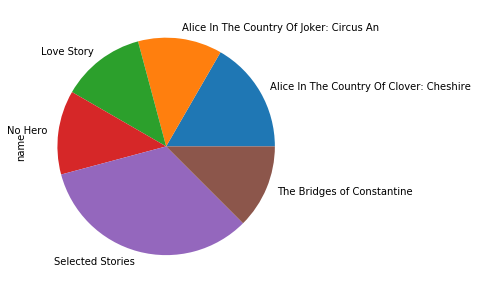

In [30]:
# Display a pie chart with the top 6 books using value_counts
new_books.name.value_counts()[0:6].sort_index().plot.pie(figsize=(15,5))

In [31]:
new_books.name.value_counts()[0:6]

Selected Stories                            8
Alice In The Country Of Clover: Cheshire    4
Alice In The Country Of Joker: Circus An    3
The Bridges of Constantine                  3
No Hero                                     3
Love Story                                  3
Name: name, dtype: int64

# What Categories Of Books are Selling the Most

In [32]:
cat = new_books['breadcrumbs']

In [33]:
cat.head()

0    Books | Literature & Fiction | Romance | C.J.'...
1    Books | Literature & Fiction | Short Stories |...
2    Books | Literature & Fiction | Romance | Heart...
3    Books | Literature & Fiction | General | Perfe...
4    Books | Literature & Fiction | Literature | Pa...
Name: breadcrumbs, dtype: object

In [34]:
# for the categories, replace "books |", and names of titles 
new_cat = []
for ca in cat:
    first = ca.replace('Books | ', '')
    comma = first.replace(' | ', ',')
    comma = ",".join(comma.split(",")[:2])
    #append the categories
    new_cat.append(comma)
    
cat = new_cat        
    

In [35]:
cat[0:5]

['Literature & Fiction,Romance',
 'Literature & Fiction,Short Stories',
 'Literature & Fiction,Romance',
 'Literature & Fiction,General',
 'Literature & Fiction,Literature']

In [36]:
len(new_books['breadcrumbs'].value_counts())

1471

In [37]:
# update the df values with the categories
new_books['breadcrumbs'] = cat

### This shows that Non Fiction, Other is the category that seems to be selling the most. Close behind are Literature & Fiction, General and Romance.

This visualization illustrates the most popular genre. This information can be useful for predicting whether or not a book will be popular.

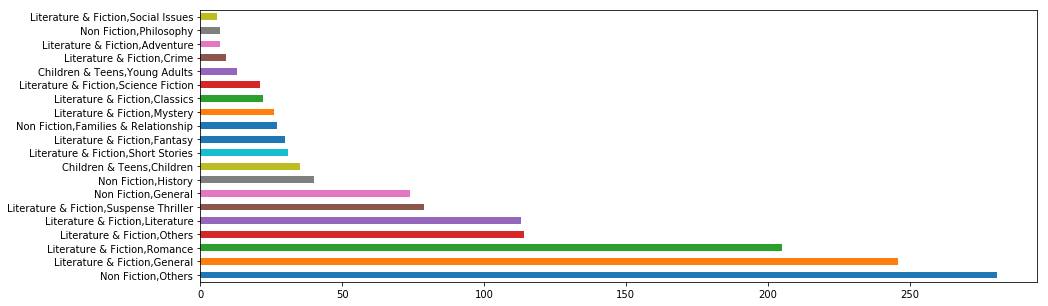

In [66]:
# display a barh graph with the counts to see what genre is selling out
new_books['breadcrumbs'].value_counts().head(20).plot.barh(figsize=(15,5))

# What Years are selling the Most Books

#### Customers are buying more recent year books than older or classics books.

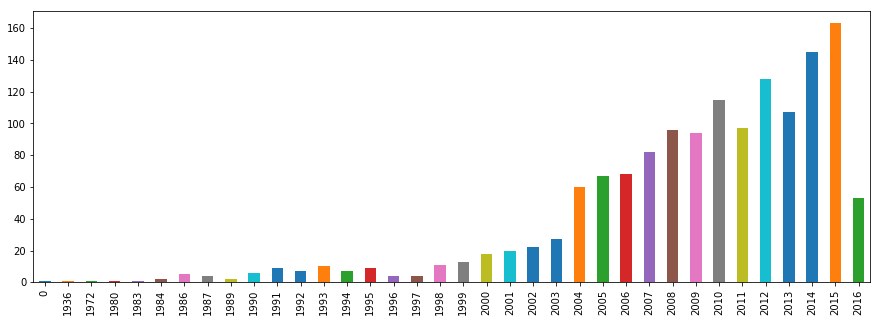

In [75]:
# display a bar graph with the years and what publication year people are buying
new_books[new_books.publication_year != 'nan'].publication_year.value_counts().sort_index().plot.bar(figsize=(15,5))

# Who are the Best Selling Authors 

In [40]:
#Make a df with the value counts index
authors = pd.DataFrame(data = new_books.Author.value_counts()).index

In [41]:
# function to calulate the mean price of the author's books
prices = []
def calculate_author_avg(names):
    for i in names:
        price = new_books[new_books.Author == i].selling_price.mean()
        prices.append(price)

calculate_author_avg(authors)



In [42]:
#Make a df with the value counts 
authors_df = pd.DataFrame(data = new_books.Author.value_counts())

In [43]:
# add a column call avg_price and set the values to prices
authors_df['avg_prices'] = prices

### We can see that the top 10 authors are selling despite difference in average price. 

In [44]:
authors_df[0:10]

,Author,avg_prices
Iris Johansen,27,385.407407
Danielle Steel,25,298.800000
Mary Balogh,21,388.619048
Kay Hooper,15,379.666667
Terry O�Brien,10,98.800000
John Grisham,9,384.666667
Julie Garwood,8,328.000000
Nora Roberts,8,360.000000
Chetan Bhagat,8,257.375000
Karen Marie Moning,8,399.000000


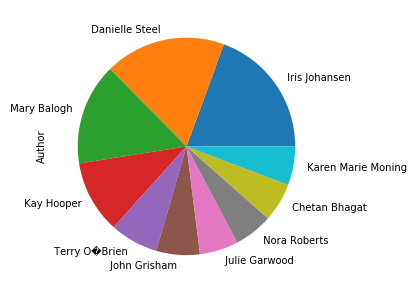

In [45]:
# display a pir chart with best selling authors
authors_df[0:10].plot.pie(y='Author', figsize=(5, 5), legend=False)

In [46]:
authors_df.describe()

,Author,avg_prices
count,689.000000,689.000000
mean,1.493469,604.211389
std,1.923017,795.322319
min,1.000000,64.000000
25%,1.000000,259.000000
50%,1.000000,399.000000
75%,1.000000,718.000000
max,27.000000,12801.000000


# Books sold based on price range

#### Price bins were created by separated average price into price ranges. There are a total of 5 price bins; 0-200, 200-400, 400-600, 600-800, and 800+

In [47]:
# Create bins to see the price ranges the authors are in.

price_bins = []

# bins with 200 were chosen because the 25% - 50% -75% increase close to 200
for price in authors_df['avg_prices']:
    if(price <= 200):
        price_bins.append('$0-200')
    if(price > 200 and price <= 400):
        price_bins.append('$200-400')
    if(price > 400 and price <= 600):
        price_bins.append('$400-600')
    if(price > 600 and price <= 800):
        price_bins.append('$600-800')
    if(price > 800):
        price_bins.append('$800+')

authors_df['bins'] = price_bins

In [48]:
len(authors_df)

689

In [49]:
price_counts = []
#count and append the number of the authors in the bin    
price_counts.append(authors_df[authors_df['bins'] == '$0-200'].Author.sum()) 
price_counts.append(authors_df[authors_df['bins'] == '$200-400'].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == '$400-600'].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == '$600-800'].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == '$800+'].Author.sum())


In [50]:
price_counts

[129, 501, 105, 155, 139]

In [51]:
bins = list(set(price_bins))

## Based on this graph books in the 600 - 800 price range are selling more by a large amount

Text(0.5, 1.0, 'Number of Books SOLD by Author Categorized in Bins')

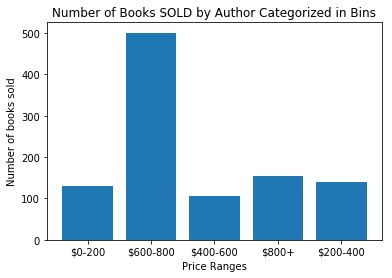

In [52]:
# plot the number of authors in the bins
plt.bar(bins, price_counts)
plt.xlabel ('Price Ranges')
plt.ylabel ('Number of books sold')
plt.title('Number of Books SOLD by Author Categorized in Bins')


# Are Customers buying High Discounted or Low Discounted Items

In [53]:
discount = new_books['discount']

In [54]:
#Replacing the double % with one %
new_discount = []
for dis in discount:
    new_discount.append(dis.replace('%%', '%'))
    
new_books['discount'] = new_discount

In [55]:
new_books.discount.head()

0    20%
1    30%
2    14%
3    21%
4    35%
Name: discount, dtype: object

## Books that are discounted at 14% are selling the most

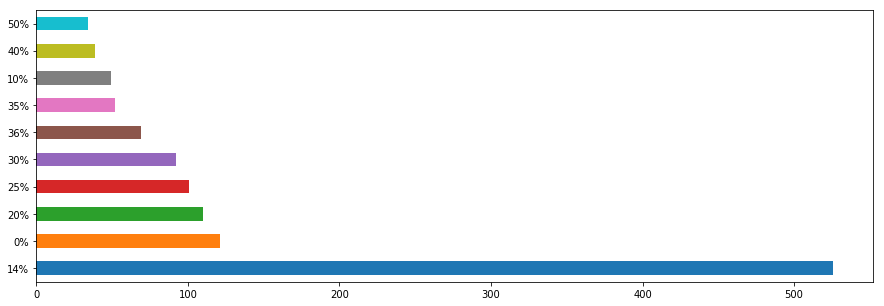

In [69]:
# display a barh plot with percentage and 
new_books["discount"].value_counts().head(10).plot.barh(figsize=(15,5))

# What are the average prices that get Discounted

In [57]:
# Get the index of the value_counts
top10_discount_index = new_books["discount"].value_counts().head(10).index

In [58]:
# Get the counts for the discounts
top10_discount = new_books["discount"].value_counts().head(10)

In [59]:
# Get the mean list and selling price for the discount
mean_prices = []
mean_selling_prices = []
selling_prices = []
for top in top10_discount_index:
    mean_prices.append(new_books[new_books['discount'] == top].list_price.mean())
    selling_prices.append(new_books[new_books['discount'] == top].selling_price.mean())


In [60]:
new_books[new_books['discount'] == "50%"].selling_price.mean()

228.94117647058823

In [61]:
selling_prices = selling_prices[0:10]

In [62]:
# create the dataframe with the mean list and selling prices for the discount
top10_discount = pd.DataFrame(data = top10_discount)
top10_discount['Number Sold'] = top10_discount['discount']
top10_discount = top10_discount.drop(columns='discount')

In [63]:
top10_discount['avg_listing_price'] = mean_prices
top10_discount['avg_selling_price'] = selling_prices

### This chart displays the average listing price and selling price of a book based on the discount given. 

This shows that after the discount of 14% the average selling price is 738.91. This is important because 738.91 falls within the 600 - 800 price range specified in the graph above this.

In [64]:
top10_discount

,Number Sold,avg_listing_price,avg_selling_price
14%,526,855.669202,738.918251
0%,121,509.000000,509.000000
20%,110,533.090909,426.409091
25%,101,846.742574,634.960396
30%,92,417.586957,292.391304
36%,69,350.057971,223.927536
35%,52,658.788462,427.865385
10%,49,491.142857,442.142857
40%,39,1218.948718,731.256410
50%,34,458.588235,228.941176


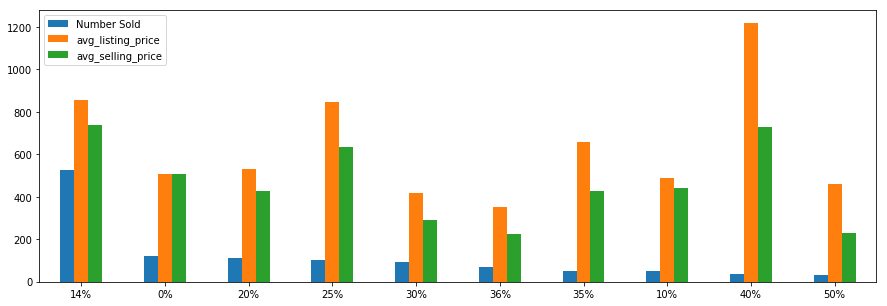

In [71]:
# plot the number sold, avg listing price, and avg selling price for that discount
top10_discount.plot.bar(rot=0, figsize=(15,5))



# Conclusion
---
The most signifcant finding is that books in the 600 to 800 price range are by far the most popular. Additionally, the most popular discount is 14% with the average price after discount to be around 739. Based on this we can expect that books priced in this range will sell better. It is also important to note that genre does have an impact on the popularity of a book. Non Fiction, Other  and Literature & Fiction are extremely popular categories. The market seems to favor books that have specific genres while falling in the 600 to 800 price range. 

When we initially found the dataset, we planned to aquire more data by using a web scrapper that would scrappe the following : <br> <ul><li>Amazon Average Ratings</li> <br><li> Reviews </li><br> </ul> We would use ratings to see if ratings influence ratings and reviews to do sentiment analysis to see how satisfied people might be when they purchase these types of books. <br> <br>Amazon had scrapper restrictions and their APIs don't provide ratings and reviews. We used Google Books API but the number of ratings for books was too small to be significant

### 5. References
---


https://www.kaggle.com/PromptCloudHQ/bestseller-books-on-paytm